# HOME CREDIT

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bo
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display
from sklearn import datasets
from colorsys import hsv_to_rgb
from seaborn import color_palette
from sklearn import datasets, linear_model
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import preprocessing
from sklearn import svm
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.cluster import KMeans
from itertools import islice
from itertools import cycle
import plotly.plotly as py
import plotly.graph_objs as go
from pandas.tools.plotting import parallel_coordinates
#import pandas.plotting.parallel_coordinates
from pandas.plotting import radviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import cluster
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import graphviz 
import plotly.plotly as py
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import graphviz
from sklearn import tree
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
apptest = pd.read_csv('application_test.csv',  thousands=',')
apptrain = pd.read_csv('application_train.csv',  thousands=',')  
bureau = pd.read_csv('bureau.csv',  thousands=',') 
bureaubal= pd.read_csv('bureau_balance.csv',  thousands=',')  #done
ccbal = pd.read_csv('credit_card_balance.csv',  thousands=',')
#homedes = pd.read_csv('HomeCredit_columns_description.csv',  thousands=',')
installpay = pd.read_csv('installments_payments.csv',  thousands=',')
poscash = pd.read_csv('POS_CASH_balance.csv',  thousands=',')
preappl = pd.read_csv('previous_application.csv',  thousands=',')  #done
#sample = pd.read_csv('sample_submission.csv',  thousands=',')

# PRE-APPROVAL

In [3]:
pd.DataFrame(preappl, index =[0])

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0


In [4]:
preappl.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
preappl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [6]:
preappl.isnull().values.any()

True

In [7]:
# Check how many values are null in each column
def show_missing_data(preappl):
    missing_data = preappl.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (preappl.shape[0] - missing_data['missing_count']) / preappl.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

show_missing_data(preappl) #[:5]

,column_name,missing_count,filling_factor
0,RATE_INTEREST_PRIVILEGED,1664263,0.356302
1,RATE_INTEREST_PRIMARY,1664263,0.356302
2,RATE_DOWN_PAYMENT,895844,46.363520
3,AMT_DOWN_PAYMENT,895844,46.363520
4,NAME_TYPE_SUITE,820405,50.880246
5,NFLAG_INSURED_ON_APPROVAL,673065,59.701871
6,DAYS_FIRST_DRAWING,673065,59.701871
7,DAYS_FIRST_DUE,673065,59.701871
8,DAYS_LAST_DUE_1ST_VERSION,673065,59.701871
9,DAYS_LAST_DUE,673065,59.701871


In [8]:
preappl.fillna(0, inplace=True)

In [9]:
preappl.isnull().values.any()

False

In [10]:
preappl.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,0.0,0.0,0.0,0.0,0.0,0.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,0.0,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,0.000,0.0,0.0,0.0,0.0,TUESDAY,11,...,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
7,1656711,296299,Cash loans,0.000,0.0,0.0,0.0,0.0,MONDAY,7,...,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
8,2367563,342292,Cash loans,0.000,0.0,0.0,0.0,0.0,MONDAY,15,...,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
9,2579447,334349,Cash loans,0.000,0.0,0.0,0.0,0.0,SATURDAY,15,...,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0


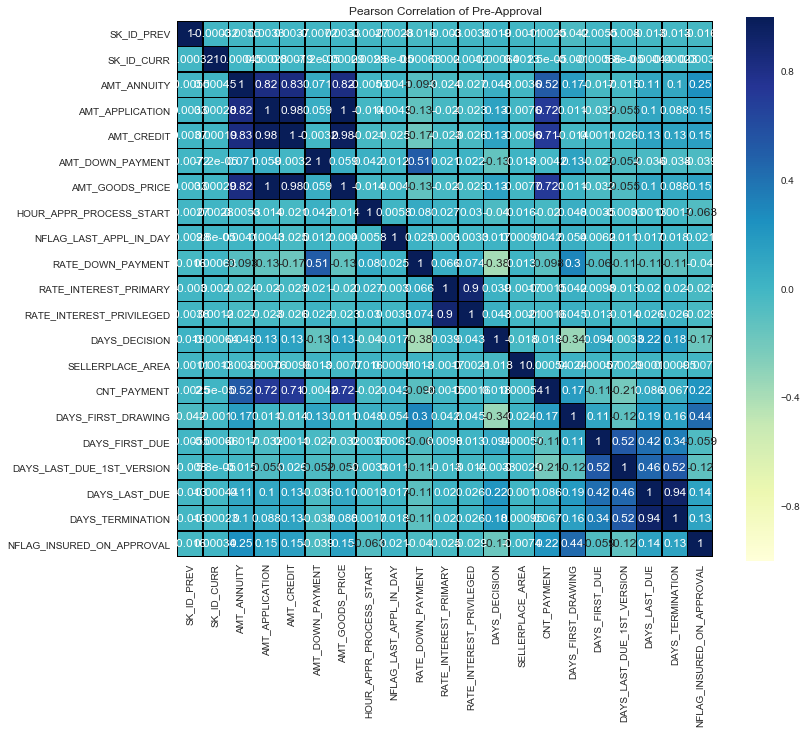

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Pre-Approval')

# Draw the heatmap using seaborn
sns.heatmap(preappl.corr(),linewidths=0.5,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [12]:
preapplgoodno = preappl[preappl['NAME_CONTRACT_STATUS']=="Refused"]

In [13]:
preapplgoodno.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,0.0,0.0,0.0,0.0,0.0,0.0
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,0.0,45000.0,SATURDAY,16,...,XNA,18.0,high,Cash Street: high,0.0,0.0,0.0,0.0,0.0,0.0
20,1506815,166490,Cash loans,25454.025,450000.0,491580.0,0.0,450000.0,MONDAY,6,...,XNA,24.0,low_normal,Cash X-Sell: low,0.0,0.0,0.0,0.0,0.0,0.0
22,1172842,302212,Cash loans,0.000,0.0,0.0,0.0,0.0,TUESDAY,9,...,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
23,1172937,302212,Cash loans,39475.305,1129500.0,1277104.5,0.0,1129500.0,THURSDAY,5,...,XNA,54.0,low_normal,Cash X-Sell: low,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
del preapplgoodno['RATE_INTEREST_PRIMARY']

In [15]:
del preapplgoodno['NFLAG_INSURED_ON_APPROVAL']

In [16]:
del preapplgoodno['DAYS_TERMINATION']

In [17]:
del preapplgoodno['DAYS_LAST_DUE_1ST_VERSION']

In [18]:
del preapplgoodno['DAYS_FIRST_DUE']

In [19]:
del preapplgoodno['DAYS_FIRST_DRAWING']

In [20]:
del preapplgoodno['RATE_INTEREST_PRIVILEGED']

In [21]:
del preapplgoodno['DAYS_LAST_DUE']

In [22]:
del preapplgoodno['SK_ID_PREV']

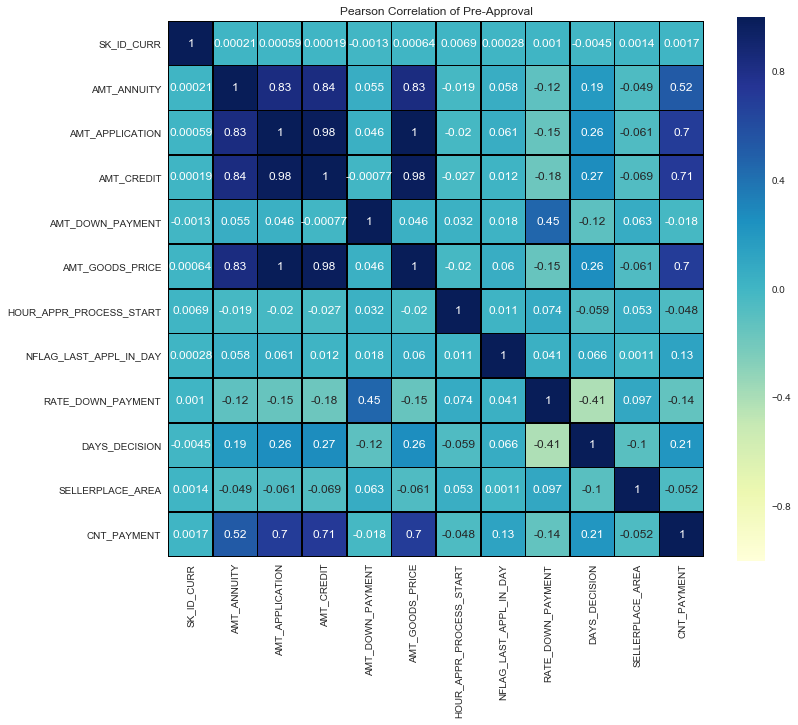

In [23]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Pre-Approval')

# Draw the heatmap using seaborn
sns.heatmap(preapplgoodno.corr(),linewidths=0.5,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# MY TARGET ARE PEOPLE WHO DID NOT GET APPROVED BUT CAN THEY STILL APPROVE THAT THEY WILL REPAY LOAN 

In [24]:
preapplgoodno.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
19,199178,Cash loans,4666.500,45000.0,49455.0,0.0,45000.0,SATURDAY,16,Y,...,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,Cash Street: high
20,166490,Cash loans,25454.025,450000.0,491580.0,0.0,450000.0,MONDAY,6,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,Cash X-Sell: low
22,302212,Cash loans,0.000,0.0,0.0,0.0,0.0,TUESDAY,9,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,0.0,XNA,Cash
23,302212,Cash loans,39475.305,1129500.0,1277104.5,0.0,1129500.0,THURSDAY,5,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,54.0,low_normal,Cash X-Sell: low


In [25]:
display(preapplgoodno)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,202054,Cash loans,31924.395,337500.000,404055.0,0.000,337500.000,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
19,199178,Cash loans,4666.500,45000.000,49455.0,0.000,45000.000,SATURDAY,16,Y,...,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,Cash Street: high
20,166490,Cash loans,25454.025,450000.000,491580.0,0.000,450000.000,MONDAY,6,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,Cash X-Sell: low
22,302212,Cash loans,0.000,0.000,0.0,0.000,0.000,TUESDAY,9,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,0.0,XNA,Cash
23,302212,Cash loans,39475.305,1129500.000,1277104.5,0.000,1129500.000,THURSDAY,5,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,54.0,low_normal,Cash X-Sell: low
29,315664,Cash loans,0.000,0.000,0.0,0.000,0.000,WEDNESDAY,15,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,0.0,XNA,Cash
36,178375,Consumer loans,7511.085,32490.000,38380.5,0.000,32490.000,MONDAY,5,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,50,Consumer electronics,6.0,high,POS household with interest
45,281470,Revolving loans,14625.000,292500.000,292500.0,0.000,292500.000,FRIDAY,17,Y,...,Repeater,XNA,Cards,x-sell,Country-wide,182,Connectivity,0.0,XNA,Card X-Sell
52,253391,Cash loans,5294.430,45000.000,47970.0,0.000,45000.000,SUNDAY,17,Y,...,Refreshed,XNA,Cash,x-sell,Regional / Local,333,Consumer electronics,12.0,high,Cash X-Sell: high
54,197343,Consumer loans,4818.780,106398.000,106398.0,0.000,106398.000,SATURDAY,14,Y,...,Repeater,Computers,POS,XNA,Country-wide,1000,Consumer electronics,24.0,low_action,POS household without interest


In [26]:
print(preapplgoodno)

         SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
4            202054         Cash loans    31924.395       337500.000   
19           199178         Cash loans     4666.500        45000.000   
20           166490         Cash loans    25454.025       450000.000   
22           302212         Cash loans        0.000            0.000   
23           302212         Cash loans    39475.305      1129500.000   
29           315664         Cash loans        0.000            0.000   
36           178375     Consumer loans     7511.085        32490.000   
45           281470    Revolving loans    14625.000       292500.000   
52           253391         Cash loans     5294.430        45000.000   
54           197343     Consumer loans     4818.780       106398.000   
80           282125    Revolving loans    33750.000            0.000   
81           454363         Cash loans    40933.575       688500.000   
84           240839         Cash loans        0.000            0

In [27]:
preapplgoodno.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [28]:
#seeit = preapplgoodno[['SK_ID_CURR','AMT_APPLICATION','NAME_CONTRACT_STATUS']]

In [29]:
#seeit.head(5)

In [30]:
#preapplgoodnogroup = preapplgoodno.groupby('SK_ID_CURR').max()

# MAIN DATAFRAME     --- preapplgoodno

# ccbal - CREDIT CARD INFORMATION

In [31]:
ccbal = pd.read_csv('credit_card_balance.csv',  thousands=',')

In [32]:
pd.DataFrame(ccbal, index =[0])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.0,877.5,0.0,877.5,1700.325,...,0.0,0.0,0.0,1,0.0,1.0,35.0,Active,0,0


In [33]:
ccbal.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [34]:
ccbal.isnull().values.any()

True

In [35]:
# Check how many values are null in each column
def show_missing_data(ccbal):
    missing_data = ccbal.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (ccbal.shape[0] - missing_data['missing_count']) / ccbal.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

show_missing_data(ccbal)

,column_name,missing_count,filling_factor
0,AMT_PAYMENT_CURRENT,767988,80.001937
1,CNT_DRAWINGS_POS_CURRENT,749816,80.475128
2,CNT_DRAWINGS_OTHER_CURRENT,749816,80.475128
3,AMT_DRAWINGS_ATM_CURRENT,749816,80.475128
4,AMT_DRAWINGS_OTHER_CURRENT,749816,80.475128
5,AMT_DRAWINGS_POS_CURRENT,749816,80.475128
6,CNT_DRAWINGS_ATM_CURRENT,749816,80.475128
7,CNT_INSTALMENT_MATURE_CUM,305236,92.051792
8,AMT_INST_MIN_REGULARITY,305236,92.051792
9,SK_ID_PREV,0,100.000000


In [36]:
ccbal.fillna(0, inplace=True)

In [37]:
ccbal.isnull().values.any()

False

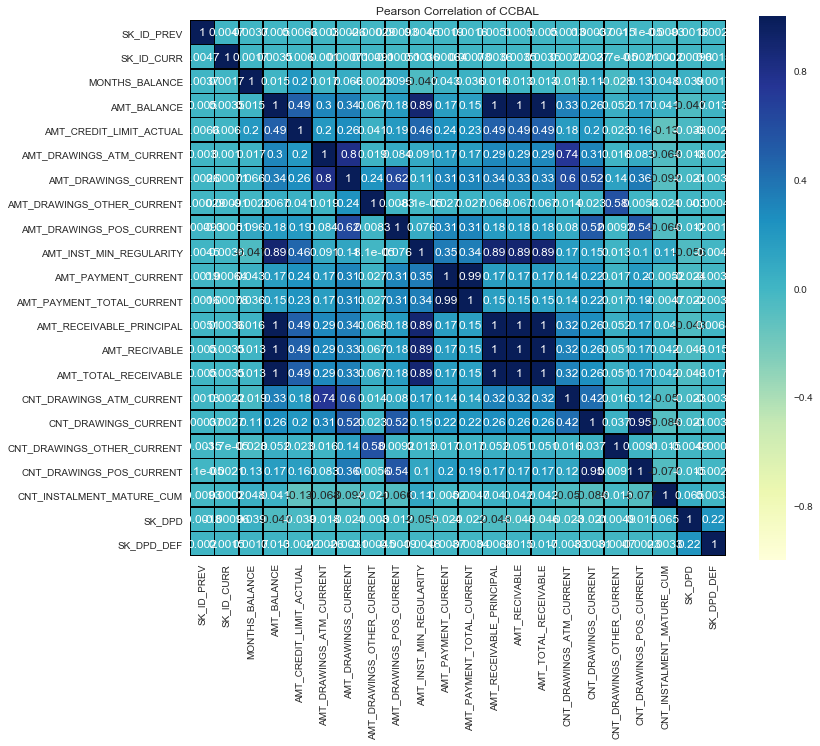

In [38]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of CCBAL')

# Draw the heatmap using seaborn
sns.heatmap(ccbal.corr(),linewidths=0.5,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [39]:
del ccbal['SK_ID_PREV']

In [40]:
ccbal.head(5)

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [41]:
preapplnoccbal = pd.merge(preapplgoodno, ccbal, on='SK_ID_CURR', how='inner')

In [42]:
preapplnoccbal.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS_y,SK_DPD,SK_DPD_DEF
0,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,Y,...,89592.615,89592.615,9.0,14,0.0,5.0,0.0,Active,0,0
1,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,Y,...,119970.765,119970.765,0.0,0,0.0,0.0,7.0,Active,0,0
2,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,Y,...,103811.400,103811.400,0.0,2,0.0,2.0,2.0,Active,0,0
3,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,Y,...,102726.855,102726.855,0.0,0,0.0,0.0,4.0,Active,0,0
4,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,Y,...,117431.010,117431.010,0.0,16,0.0,16.0,5.0,Active,0,0


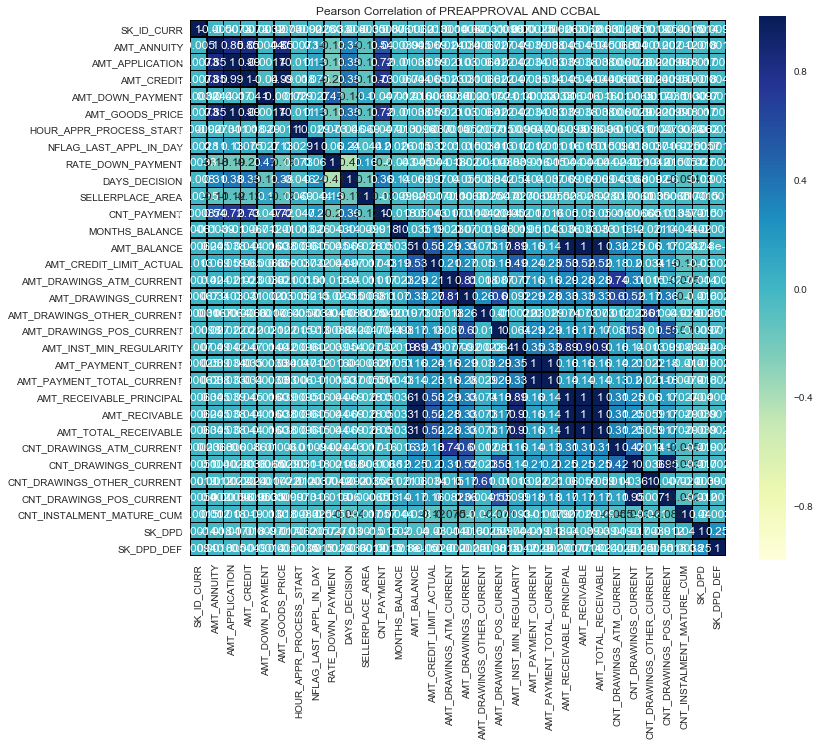

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of PREAPPROVAL AND CCBAL')

# Draw the heatmap using seaborn
sns.heatmap(preapplnoccbal.corr(),linewidths=0.5,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [ ]:
preapplnoccbal.describe()

# NEW MAIN  ---  preapplnoccbal

In [ ]:
bureau = pd.read_csv('bureau.csv',  thousands=',') 

In [ ]:
pd.DataFrame(bureau, index =[0])

In [ ]:
bureau.isnull().values.any()

In [ ]:
# Check how many values are null in each column
def show_missing_data(bureau):
    missing_data = bureau.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (bureau.shape[0] - missing_data['missing_count']) / bureau.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

show_missing_data(bureau)

In [ ]:
bureau.fillna(0, inplace=True)

In [ ]:
bureau.isnull().values.any()

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of BUREAU')

# Draw the heatmap using seaborn
sns.heatmap(bureau.corr(),linewidths=0.5,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [ ]:
#preapplnoccbalbur = pd.merge(preapplnoccbal, bureau, on='SK_ID_CURR', how='inner')

In [ ]:
bureaubal= pd.read_csv('bureau_balance.csv',  thousands=',') 

In [ ]:
pd.DataFrame(bureaubal, index =[0])

In [ ]:
bureaubal.isnull().values.any()

In [ ]:
bureaubureaubal = pd.merge(bureau, bureaubal, on='SK_ID_BUREAU', how='inner')

In [ ]:
bureaubureaubal.head(5)

In [ ]:
bureaubureaubal.isnull().values.any()

# bureaubureaubal and preapplnoccbal

In [ ]:
installpay = pd.read_csv('installments_payments.csv',  thousands=',')

In [ ]:
pd.DataFrame(installpay, index =[0])

In [ ]:
installpay.head(5)

In [ ]:
poscash = pd.read_csv('POS_CASH_balance.csv',  thousands=',')

In [ ]:
pd.DataFrame(poscash, index =[0])

In [ ]:
poscash.head(5)

In [ ]:
installpay.describe()

In [ ]:
poscash.describe()

In [ ]:
installpay.isnull().values.any()

In [ ]:
poscash.isnull().values.any()

In [ ]:
# Check how many values are null in each column
def show_missing_data(installpay):
    missing_data = installpay.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (installpay.shape[0] - missing_data['missing_count']) / installpay.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

show_missing_data(installpay)

In [ ]:
# Check how many values are null in each column
def show_missing_data(poscash):
    missing_data = installpay.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (poscash.shape[0] - missing_data['missing_count']) / poscash.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

show_missing_data(poscash)

In [ ]:
installpay.fillna(0, inplace=True)

In [ ]:
poscash.fillna(0, inplace=True)

In [ ]:
installpay.isnull().values.any()

In [ ]:
#installposcash = pd.merge(installpay,poscash, on='SK_ID_CURR', how='inner')

In [ ]:
poscash.isnull().values.any()

# ---------------------------------------------------------------

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation ofpreapplnoccbal')

# Draw the heatmap using seaborn
sns.heatmap(preapplnoccbal.corr(),linewidths=0.5,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [ ]:
preapplnoccbal.corr()

In [ ]:
preapplnoccbal.columns